# Статистика, DS-поток
## Практическое задание 5. Bias-Variance Decomposition

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.5)

-----

## Задача 1.
Пусть $\widehat{\theta}$ &mdash; оценка параметра $\theta$ и $MSE_{\widehat{\theta}} (\theta) = \mathsf{E}_{\theta} \left(\widehat{\theta} - \theta\right)^2$ &mdash; среднеквадратичная ошибка оценки $\widehat{\theta}$. Тогда справедливо bias-variance разложение:
$$MSE_{\widehat{\theta}} (\theta) = \textrm{bias}_{\widehat{\theta}}^2(\theta) + \textrm{var}_{\widehat{\theta}} (\theta); \\
\begin{align*}
\textrm{bias}_{\widehat{\theta}} (\theta) & = \mathsf{E}_{\theta} \widehat{\theta} - \theta; \\
\textrm{var}_{\widehat{\theta}} (\theta) & = \mathsf{D}_{\theta} \widehat{\theta}.
\end{align*}$$

*a).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathcal{K} = \left\{c_n X_{(n)}, c_n\in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:** 

$\textrm{bias}^2 = \theta^2(\frac{c_{n}n}{n+1} - 1)^2$

$\textrm{var} = \theta^2c^2(\frac{n}{n+2} - (\frac{n}{n+1})^2)$



Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отображена информативная часть графика (по оси *x* примерно от `0.9` до `1.4`). Не забудьте добавить сетку и легенду, а также подписать оси.

На графике проведите вертикальные линии с координатами $c$, соответствующими минимуму функции риска, несмещенной оценке и ОМП.

Сделайте выводы. Какое значение $c_n$ дает минимум функции риска? Каково поведение компонент разложения? Как соотносятся полученные оценки?

**Решение:**

In [2]:
n = 5
theta = 1
c_grid = np.linspace(0, 2, 1000)
sample = sps.uniform().rvs(size=n)

bias_sq = (theta**2)*(((c_grid*n)/(n+1)) - 1)**2
var =  (theta**2)*(c_grid**2)*(n/(n+2) - (n/(n+1))**2)

mse = bias_sq + var

c_min = (n+2)/(n+1)
c_mle = 1
c_unbiased = (n+1)/n

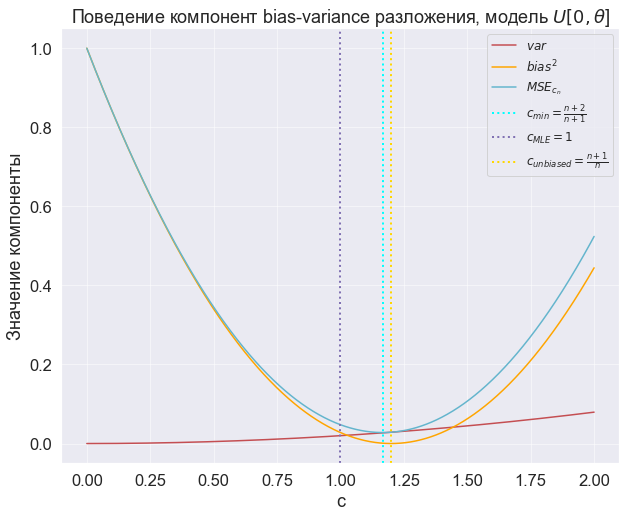

In [3]:
plt.figure(figsize=(10, 8))
plt.plot(c_grid, var, label='$var$', c='r')
plt.plot(c_grid, bias_sq, label='$bias^2$', c='orange')
plt.plot(c_grid, mse, label='$MSE_{c_{n}}$', c='c')
plt.axvline(c_min, c='aqua', ls=':', lw=2, label='$c_{min} = \\frac{n+2}{n+1}$')
plt.axvline(c_mle, c='m', ls=':', lw=2, label='$c_{MLE} = 1$')
plt.axvline(c_unbiased, c='gold', ls=':', lw=2, label='$c_{unbiased} = \\frac{n+1}{n}$')

plt.legend(prop={'size': 12})
plt.grid(True, lw=0.5)
plt.title('Поведение компонент bias-variance разложения, модель $U[0, \\theta$]')
plt.xlabel('c')
plt.ylabel('Значение компоненты');

**Вывод:** *Обе компоненты MSE меняются квадратично. Значение $c_{n}$, соответствующие коэффициенту перед $X_{n}$ в несмещенной оценке соответсвует минимуму $bias^2$, $c=\frac{n+2}{n+1}$ соответствует минимуму MSE. MSE несмещенной оценки ниже MSE ОМП.*

*b).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $\mathcal{N}(a, \sigma^2)$, где $a$ и $\sigma$ неизвестны. Для величины $\sigma^2$ рассмотрим класс оценок $\mathcal{K} = \left\{\frac{1}{c_n}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, \; c_n \in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:**

$\textrm{bias}^2 = (\frac{\sigma^2}{c_{n}}(n-1) - \sigma^2)^2$

$\textrm{var} = \frac{2\sigma^4}{c_{n}^2}(n-1)$

Повторите исследование, аналогичное пункту *a)* для $a = 0, \sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика рядом с помощью функции `plt.subplot`. Не забудьте сделать выводы.

**Решение:**

*Тут я обозначаю `с` именно как коэффициент перед оценкой, то есть вся дробь, a не само значение $c_{n}$*

In [4]:
n = 5
a = 0
sigma_sq = 1
c_grid = np.linspace(-1, 1, 1000)
sample = sps.norm().rvs(size=n)

bias_sq = (sigma_sq*(n-1)/c_grid - sigma_sq)**2
var = 2*(sigma_sq**2)*(n-1)/c_grid**2

mse = bias_sq + var

c_min = 1/(n+1)
c_mle = 1/n
c_unbiased = 1/(n-1)

In [5]:
n_2 = 10
bias_sq_2 = (sigma_sq*(n_2-1)/c_grid - sigma_sq)**2
var_2 = 2*(sigma_sq**2)*(n_2-1)/c_grid**2

mse_2 = bias_sq + var

c_min_2 = 1/(n_2+1)
c_mle_2 = 1/n_2
c_unbiased_2 = 1/(n_2-1)

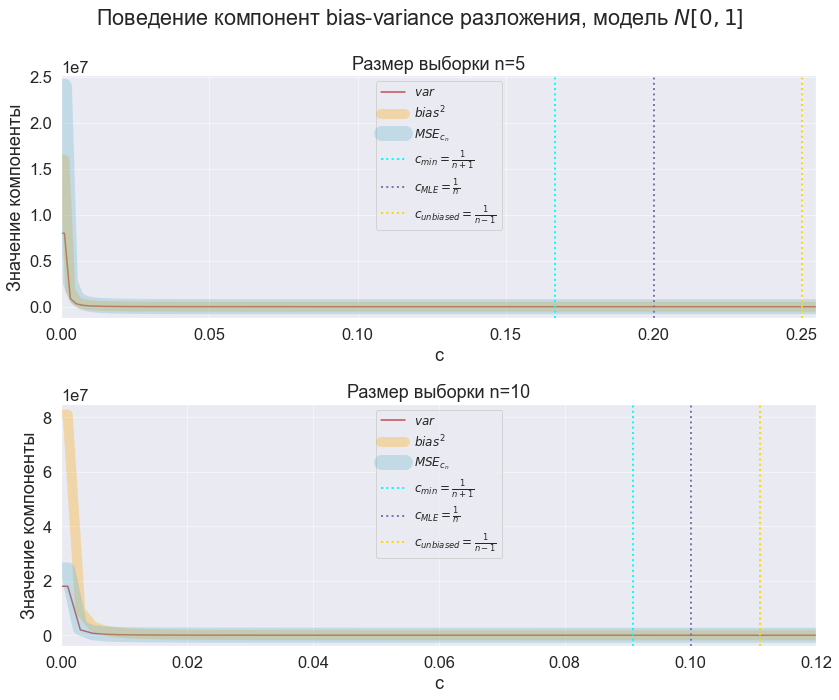

In [6]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 10))

ax1.plot(c_grid, var, label='$var$', c='r')
ax1.plot(c_grid, bias_sq, label='$bias^2$', c='orange', alpha=0.3, lw=10)
ax1.plot(c_grid, mse, label='$MSE_{c_{n}}$', c='c', alpha=0.3, lw=15)
ax1.axvline(c_min, c='aqua', ls=':', lw=2, label='$c_{min} = \\frac{1}{n+1}$')
ax1.axvline(c_mle, c='m', ls=':', lw=2, label='$c_{MLE} = \\frac{1}{n}$')
ax1.axvline(c_unbiased, c='gold', ls=':', lw=2, label='$c_{unbiased} = \\frac{1}{n-1}$')
ax1.set_xlim(0, 0.255)
ax1.legend(prop={'size': 12})
ax1.grid(True, lw=0.5)
ax1.set_xlabel('c')
ax1.set_ylabel('Значение компоненты')
ax1.set_title('Размер выборки n=5')


ax2.plot(c_grid, var_2, label='$var$', c='r')
ax2.plot(c_grid, bias_sq_2, label='$bias^2$', c='orange', alpha=0.3, lw=10)
ax2.plot(c_grid, mse_2, label='$MSE_{c_{n}}$', c='c', alpha=0.3, lw=15)
ax2.axvline(c_min_2, c='aqua', ls=':', lw=2, label='$c_{min} = \\frac{1}{n+1}$')
ax2.axvline(c_mle_2, c='m', ls=':', lw=2, label='$c_{MLE} = \\frac{1}{n}$')
ax2.axvline(c_unbiased_2, c='gold', ls=':', lw=2, label='$c_{unbiased} = \\frac{1}{n-1}$')
ax2.set_xlim(0, 0.12)
ax2.legend(prop={'size': 12})
ax2.grid(True, lw=0.5)
ax2.set_xlabel('c')
ax2.set_ylabel('Значение компоненты')
ax2.set_title('Размер выборки n=10')

plt.suptitle('Поведение компонент bias-variance разложения, модель $N[0, 1$]')
fig.tight_layout();

**Вывод:** *Тут картина немного другая - все 3 оценки дают примерно одинаковый нулевой MSE, так как функция очень быстро убывает от 0. В данном случае почти неважно, какую оценку брать, обе компоненты MSE бесконечно близко к 0. Рассчеты оценок брала с семинаров, должны быть правильные.*

*c).* Пусть $X = (X_1, \dots, X_n)$ &mdash; выборка из распределения $Exp (\theta)$. Рассмотрим класс оценок $\mathcal{K} = \left\{\frac{c_n}{X_1 + \dots + X_n}, \; c_n \in\mathbb{R}\right\}$. Выпишите формулы bias-variance разложения для таких оценок.

**Ответ:** 

$\textrm{bias}^2 = \theta^2(\frac{c_{n}}{n-1} - 1)^2$

$\textrm{var} = \theta^2c_{n}^2(\frac{1}{(n-1)(n-2)} - (\frac{1}{n-1})^2)$

Повторите исследование, аналогичное пункту *c)* для $\theta = 1$ и $n = 7$. Не забудьте сделать выводы.

**Решение:**

In [7]:
n = 7
theta = 1
c_grid = np.linspace(0, 10, 1000)
sample = sps.expon().rvs(size=n)

bias_sq = (theta**2)*(((c_grid)/(n-1)) - 1)**2
var =  (theta**2)*(c_grid**2)*(1/((n-1)*(n-2)) - (1/(n-1))**2)

mse = bias_sq + var

c_min = n-2
c_mle = n
c_unbiased = n-1

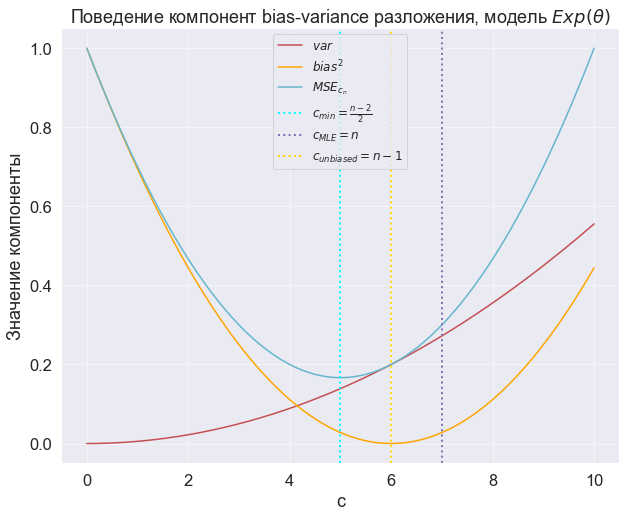

In [8]:
plt.figure(figsize=(10, 8))
plt.plot(c_grid, var, label='$var$', c='r')
plt.plot(c_grid, bias_sq, label='$bias^2$', c='orange')
plt.plot(c_grid, mse, label='$MSE_{c_{n}}$', c='c')
plt.axvline(c_min, c='aqua', ls=':', lw=2, label='$c_{min} = \\frac{n-2}{2}$')
plt.axvline(c_mle, c='m', ls=':', lw=2, label='$c_{MLE} = n$')
plt.axvline(c_unbiased, c='gold', ls=':', lw=2, label='$c_{unbiased} = n-1$')

plt.legend(prop={'size': 12})
plt.grid(True, lw=0.5)
plt.title('Поведение компонент bias-variance разложения, модель $Exp(\\theta)$')
plt.xlabel('c')
plt.ylabel('Значение компоненты');

**Вывод:** *Обе компоненты MSE меняются квадратично. Значение $c_{n}$, соответствующие коэффициенту перед $\frac{1}{\sum{X_{i}}}$ в несмещенной оценке соответсвует минимуму $bias^2$, но $c_{min}=\frac{n+2}{2}$ соответствует минимуму MSE. Здесь также ошибка для ОМП больше, чем для несмещенной оценки.*

Сделайте вывод по результатам пунктов *a)*, *b)*, *c)*.

**Общий вывод:** *Несмещенные оценки не всегда хорошие. Если мы немного отойдем от минимума MSE к несмещенной оценке, то ошибка может сильно увеличиться. То же самое можно сказать про ОМП. А может быть наоборот - все 3 оценки, как в случае нормального распределения, дают одинаковую ошибку, значит их сравнить по с/к методу нельзя.*




________
## Задача 2.
*a).* Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом $0.01$ сгенерируйте $5000$ независимых выборок $X^1=\left(X^1_1, \dots, X^1_{100} \right), \dots, X^{5000} = \left(X^{5000}_1, \dots, X^{5000}_{100} \right)$ из распределения $U[0, \theta]$.

Рассмотрим одну из перечисленных выше оценок $\widehat{\theta}$. Посчитайте ее значение по каждой выборке. Тем самым, для данного $\theta$ получится $5000$ реализаций этой оценки $\widehat{\theta}_1, ..., \widehat{\theta}_{5000}$, где значение $\widehat{\theta}_j$ посчитано по реализации выборки $X^j$.

Теперь можно оценить функцию риска этой оценки с помощью усреднения
$$\widehat{R}_{\widehat{\theta}}(\theta) = \frac{1}{5000}\sum\limits_{j=1}^{5000} L\left(\widehat{\theta}_j, \theta\right),$$
где $L$ — одна из двух функций потерь: квадратичная $L(x, y)=(x-y)^2$ и линейная $L(x, y)=\left|x-y\right|$.

Для каждого из типов функций потерь постройте свой график. Нанесите на этот график для каждой из четырех оценок $\widehat{\theta}$ оценку функции потерь $\widehat{R}_{\widehat{\theta}}(\theta)$, пользуясь шаблоном ниже. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

*Совет*: при тестировании кода запускайте его с небольшими размерами данных. Например, используйте 100 реализаций выборок. Финальные результаты получите, поставив требуемые значения размеров данных.

В задаче доспустимо использовать короткие циклы, то есть с малым количествои итераций.

In [50]:
thetas = np.linspace(1e-6, 2, 200, endpoint=True)
theta_grid = np.repeat(thetas, n*k)
n = 100
k = 5000

In [51]:
sample = sps.uniform(scale=theta_grid).rvs().reshape(200, k, n)

In [52]:
est_1 = 2*sample.mean(axis=2)
est_2 = (n+1)*sample.min(axis=2)
est_3 = sample.min(axis=2) + sample.max(axis=2)
est_4 = (n+1)*sample.max(axis=2) / n

In [90]:
estimations = [est_1, est_2, est_3, est_4]

In [53]:
quad_loss = lambda x, y: (x - y)**2
abs_loss = lambda x, y: np.abs(x - y)

In [93]:
rs_quad = []
rs_abs = []
thetas_mx = np.repeat(thetas, k).reshape(200, k)

for est in estimations:
    r_quad = np.sum(quad_loss(est, thetas_mx), axis=1) / k
    rs_quad.append(r_quad)
    r_abs = np.sum(abs_loss(est, thetas_mx), axis=1) / k
    rs_abs.append(r_abs)
    
rs_quad = np.array(rs_quad)
rs_abs = np.array(rs_abs)

In [99]:
estim_names = ['$2\\overline{X}$', '$(n+1)X_{(1)}$', '$X_{(1)}+X_{(n)}$', '$\\frac{n+1}{n} X_{(n)}$']

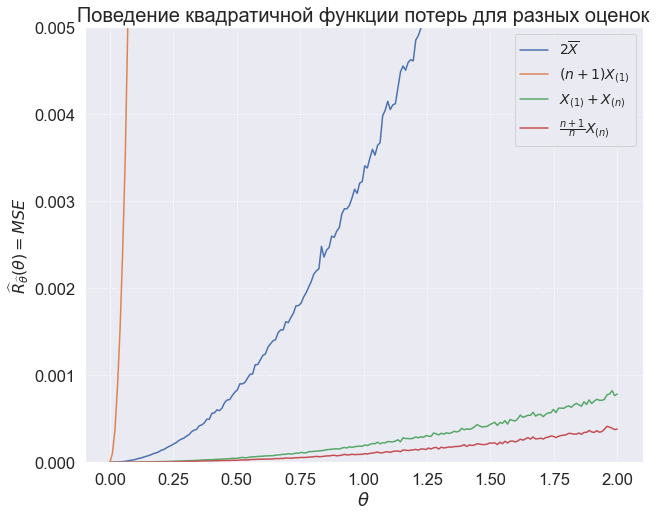

In [110]:
plt.figure(figsize=(10, 8))

for i in range(4):
    plt.plot(thetas, rs_quad[i], label=estim_names[i])  # для каждой оценки
    plt.grid(ls=':')
    plt.xlabel('$\\theta$')
    plt.ylabel('$\\widehat{R}_{\\widehat{\\theta}}(\\theta) = MSE$', fontsize=16)
    plt.legend(fontsize=14)

plt.title('Поведение квадратичной функции потерь для разных оценок', fontsize=20)
plt.ylim((0, 0.005));

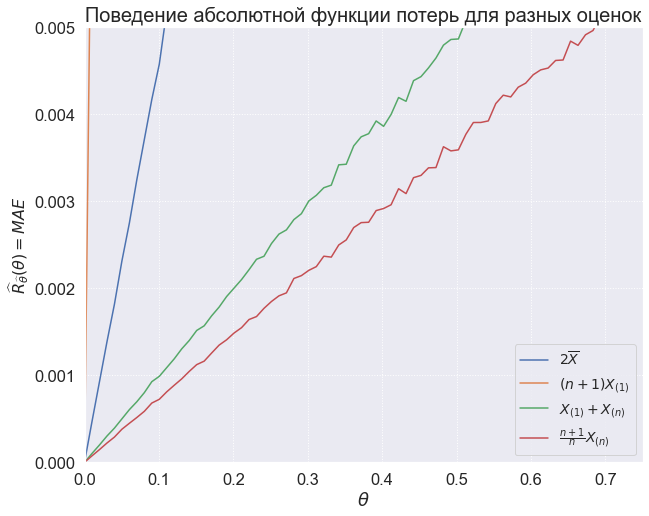

In [117]:
plt.figure(figsize=(10, 8))

for i in range(4):
    plt.plot(thetas, rs_abs[i], label=estim_names[i])  # для каждой оценки
    plt.grid(ls=':')
    plt.xlabel('$\\theta$')
    plt.ylabel('$\\widehat{R}_{\\widehat{\\theta}}(\\theta) = MAE$', fontsize=16)
    plt.legend(fontsize=14)

plt.title('Поведение абсолютной функции потерь для разных оценок', fontsize=20)
plt.ylim((0, 0.005))
plt.xlim((0, 0.75));

Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:** 
*В среднеквадратичном подходе лучше оценка $\frac{n+1}{n} X_{(n)}$, так для нее при небольшом изменении параметра $\theta$ MSE растет медленнее всего. Аналогичный результат получился в абсолютном подходе*




